In [6]:
from sklearn import tree, datasets
import numpy as np
import pandas as pd
import tree_vis

### Prepare Example Dataset and Train the Decision Tree

In [142]:
iris_raw_data = datasets.load_iris()
X, Y = (iris_raw_data.data, iris_raw_data.target)
iris_data = pd.DataFrame(X)
new_column_names = [name.replace(" (cm)", "").replace(" ", "_") for name in iris_raw_data["feature_names"]]
iris_data.columns = new_column_names
species_names = iris_raw_data["target_names"]
iris_target = np.vectorize({i:species for i,species in zip(range(3), species_names)}.get)(Y)
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [145]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth=2)
clf.fit(iris_data, iris_target)
clf.score(iris_data, iris_target)

0.96

### Generate Visualizations and Explanations of the Tree

In [160]:
# explanation string directly from sklearn.tree.DecisionsTreeClassifier object
tree_vis.explain_tree(clf, indent = "  |  ",
                      feature_names = iris_data.columns.values[0:4], category_names = species_names)

The binary tree structure has 5 nodes:
[Split] Node 0: go to node 1 if (petal_width < 0.8) else to node 2.
  |  [Leaf]  Node 1: 100% are setosa.
  |  [Split] Node 2: go to node 3 if (petal_width < 1.75) else to node 4.
  |    |  [Leaf]  Node 3: 91% are versicolor.
  |    |  [Leaf]  Node 4: 98% are virginica.


[Split] go to first branch if (age < 18) else to second branch.
	[Leaf] Minor
	[Leaf] Adult


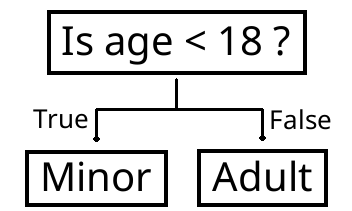

In [162]:
# manually create a decision tree
tc = tree_vis.ThresholdCondition("age", 18)
left = tree_vis.DecisionTreeNode(value="Minor")
right = tree_vis.DecisionTreeNode(value="Adult")
node = tree_vis.DecisionTreeNode(tc, 0, left, right)

# generate explanation string and visualization
node.explain_tree(out=True)
node.visualize_tree(margin=20, font_size=40, arrow_height=40)

[Split] go to first branch if (petal_width < 0.8) else to second branch.
	[Leaf] 100% are setosa
	[Split] go to first branch if (petal_width < 1.75) else to second branch.
		[Leaf] 91% are versicolor
		[Leaf] 98% are virginica


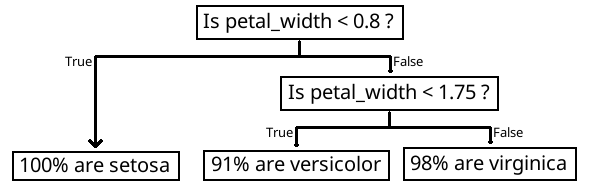

In [163]:
# or convert from an sklearn.tree.DecisionsTreeClassifier tree into a tree_vis.DecisionTreeNode object
converted_clf = tree_vis.convert_from_sklearn(clf, feature_names = iris_data.columns.values[0:13], category_names = species_names)
converted_clf.explain_tree(out=True)
converted_clf.visualize_tree()